<a href="https://colab.research.google.com/github/Alejandro-ZZ/Deep-Learning/blob/master/Multilayer-Perceptron/Binary_Classification_IMBD_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary clasification | Keras**

* Construction of different multilayer perceptron neural networks using Keras.

* The [IMDB movie review sentiment classification dataset](https://keras.io/api/datasets/imdb/) is used. The goal of the model is to predict wheter a review was positive or negative.

* Four models where created to show how loss scores and metrics improve (or not) by changing some parameters.

In [ ]:
from keras.datasets import imdb
from keras import models, layers, optimizers, regularizers
from keras.callbacks import ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
import time, re

## **IMDB Dataset**

The dataset have 25,000 movies reviews from IMDB, labeled by sentiment (1:positive, 0:negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers).

In [ ]:
# Only the `num_words` most frequent words are kept.
#     * DATA: lists of sequences, which are lists of indexes (integers). 
#             The integer "3" encodes the 3rd most frequent word in the data.
#     
#     * LABELS: lists of integer labels (1 or 0).
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Retrieve the word index file mapping words to indices
word_index  = imdb.get_word_index()

# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index  = dict([(value, key) for (key, value) in word_index .items()]) 

# Print the first 20 word indexes of review 0
print('First 20 word indexes of review 0:\n    ', train_data[0][:20])

# Review decoded. It replaces every unknown word with a '?'
decoded_sequence  = " ".join( [inverted_word_index.get(i - 3, '?') for i in train_data[0][:20]] )
print('\nFirst 20 words of review 0:\n    ', decoded_sequence, '...') 

1641221/1641221 [==============================] - 0s 0us/step
First 20 word indexes of review 0:
     [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]

First 20 words of review 0:
     ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you ...


## **Training params**

In [ ]:
epochs = 100
batch_size = 512

optimizer = 'rmsprop' # 'adam'
loss_fnc = 'binary_crossentropy'
metrics = ['acc']

## **One-hot encoding**

In [ ]:
def vectorize(sequences, dim=10000):
    restults = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults

# Input data (features)
x_data = vectorize(train_data)
x_test = vectorize(test_data)

# Labels data (targets)
y_data = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Validation and train set
x_val = x_data[:10000]
x_train = x_data[10000:]

y_val = y_data[:10000]
y_train =  y_data[10000:]


# Data shapes
print("Train data ", x_train.shape)
print("Train labels ", y_train.shape)
print("-"*50)
print("Validation data ", x_val.shape)
print("Validation labels ", y_val.shape)
print("-"*50)
print("Test data ", x_test.shape)
print("Test labels ", y_test.shape)

Train data  (15000, 10000)
Train labels  (15000,)
--------------------------------------------------
Validation data  (10000, 10000)
Validation labels  (10000,)
--------------------------------------------------
Test data  (25000, 10000)
Test labels  (25000,)


## **Training models**

In [ ]:
def plot_results(results_dict):
  '''
  Plot training variables:
      - Training and validation set loss score
      - Training and validation set accuracy

  Inputs
  ------
  results_dict: dict(String, list)
                Dictionary with values to plot.
  '''
  figure = plt.figure(figsize=(14, 6))

  figure.add_subplot(1, 2, 1)
  plt.plot(range(1, epochs+1), results_dict['loss'], label='Training loss')
  plt.plot(range(1, epochs+1), results_dict['val_loss'], '--', label='Validation loss')
  plt.title('Loss score')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  figure.add_subplot(1, 2, 2)
  plt.plot(range(1, epochs+1), results_dict['acc'], label='Training acc')
  plt.plot(range(1, epochs+1), results_dict['val_acc'], '--', label='Validation acc')
  plt.title('Accuracy score')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()



def train(model_name, model_layers, callbacks=None):
    # Compiling model
    model = models.Sequential(layers=model_layers, name=model_name)
    model.compile(optimizer=optimizer,
                  loss=loss_fnc,
                  metrics=metrics)
    print(model.summary(), '\n')


    # Trining model
    start_process_time = time.time()
    # ------------------------------------------------------------------------------
    results = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_val, y_val), verbose=0, 
                        callbacks=callbacks)
    # ------------------------------------------------------------------------------
    process_time = time.time() - start_process_time
    minutes = process_time / 60
    seconds = (minutes - int(minutes)) * 60
    print(f'[INFO] Total epochs: {epochs}')
    print(f"[INFO] Training execution time: {int(minutes)}m {int(seconds)}s\n")

    # Save results
    train_results[model_name] = {}
    train_results[model_name]['model'] = model
    train_results[model_name]['results'] = results

    # Plotting results
    plot_results(train_results[model_name]['results'].history)


  
# Dictionary to save model and results
train_results = {}

### Model 1: Initial

Model: "1_initial"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 128)               1280128   
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 64)                4160      
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,292,609
Trainable params: 1,292,609
Non-trainable params: 0
_________________________________________________________________
None 

[INFO] Total epochs: 100
[INFO] Training execution time: 2m 50s



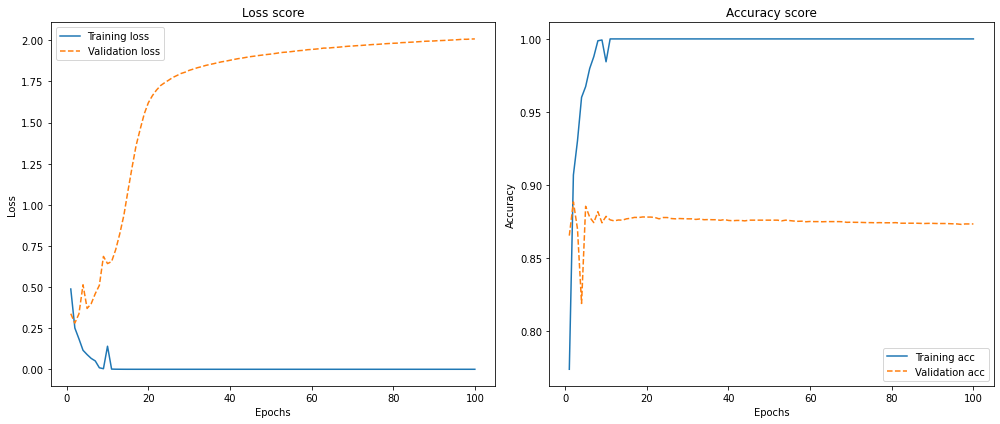

In [ ]:
model_layers = [layers.Dense(128, activation="relu", name='Input_layer', input_shape=(10000,)),
                layers.Dense(64, activation="relu", name='layer2'),
                layers.Dense(64, activation="relu", name='layer3'),
                layers.Dense(1, activation='sigmoid', name='Output_layer')]

train(model_name='1_initial', model_layers=model_layers)

*	The plot of training loss decreases to a point of stability.

* The validation and training curves diverge. It indicates that model is overfitted.

* One way to decrease overfitting is to reduce the capacity of the model.

### Model 2: Simpler

Model: "2_simpler"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 32)                320032    
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 16)                272       
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 320,849
Trainable params: 320,849
Non-trainable params: 0
_________________________________________________________________
None 

[INFO] Total epochs: 100
[INFO] Training execution time: 1m 3s



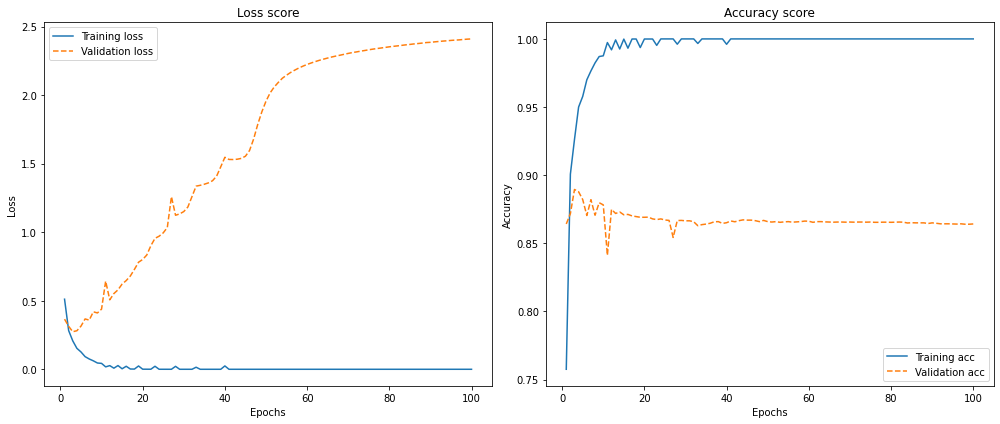

In [ ]:
model_layers= [layers.Dense(32, activation="relu", name='Input_layer', input_shape=(10000,)),
               layers.Dense(16, activation="relu", name='layer2'),
               layers.Dense(16, activation="relu", name='layer3'),
               layers.Dense(1, activation='sigmoid', name='Output_layer')]

train(model_name='2_simpler', model_layers=model_layers)

* The model is still overfitted. Dropout layers are added between the hidden ones, and a Dense layer is removed.

* In addition, the learning rate is regularized by a callback so that it decreases as the validation loss plateaus.

### Model 3: Dropout

Model: "3_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 16)                160016    
                                                                 
 layer2 (Dropout)            (None, 16)                0         
                                                                 
 layer3 (Dense)              (None, 16)                272       
                                                                 
 layer4 (Dropout)            (None, 16)                0         
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None 

[INFO] Total epochs: 100
[INFO] Training exe

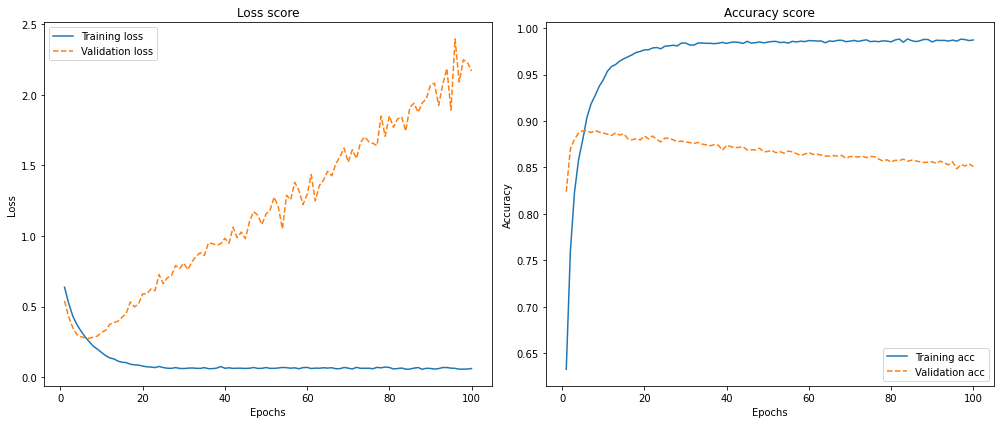

In [ ]:
# https://keras.io/api/callbacks/reduce_lr_on_plateau/
callbacks = [ReduceLROnPlateau(monitor='val_loss', 
                               factor=0.2, 
                               patience=5, 
                               min_lr=0.001)]

model_layers = [layers.Dense(16, activation='relu', name='Input_layer', input_shape=(10000,)),
                layers.Dropout(0.5, name='layer2'),
                layers.Dense(16, activation='relu', name='layer3'),
                layers.Dropout(0.5, name='layer4'),
                layers.Dense(1, activation='sigmoid', name='Output_layer')]

train(model_name='3_dropout', model_layers=model_layers, callbacks=callbacks)

* The model is still overfitted. Weight regularizer is included in the next model.

### Model 4: Regularization

Model: "4_regularizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 16)                160016    
                                                                 
 layer2 (Dropout)            (None, 16)                0         
                                                                 
 layer3 (Dense)              (None, 16)                272       
                                                                 
 layer4 (Dropout)            (None, 16)                0         
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None 

[INFO] Total epochs: 100
[INFO] Training

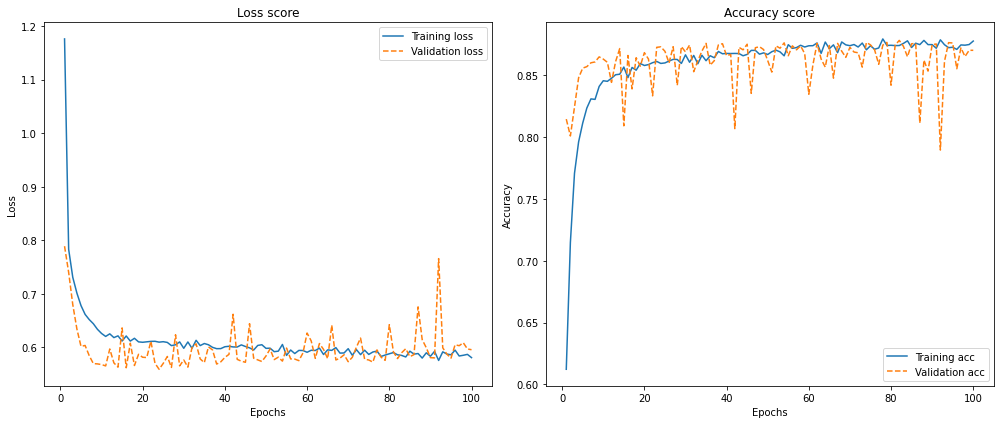

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', 
                               factor=0.2, 
                               patience=5, 
                               min_lr=0.001)]

model_layers = [layers.Dense(16, activation='relu', input_shape=(10000,), 
                             kernel_regularizer=regularizers.l1(0.001), name='Input_layer'),
                layers.Dropout(0.5, name='layer2'),
                layers.Dense(16, activation='relu', input_shape=(10000,), 
                             kernel_regularizer=regularizers.l1(0.001), name='layer3'),
                layers.Dropout(0.5, name='layer4'),
                layers.Dense(1, activation='sigmoid', name='Output_layer')]

train(model_name='4_regularizer', model_layers=model_layers, callbacks=callbacks)

* The plot of training loss decreases to a point of stability.

* The generalization gap between training and validation curves had decreased (nearly zero in an ideal situation).

* The plot of validation loss decreases. However, the learning curve for validation loss shows noisy movements. It indicates that the validation dataset does not provide sufficient information to evaluate the ability of the model to generalize.

The training curves can be further analyzed as previously shown to obtain better model performance. Next, the last model (4_regularizer) is selected and evaluated to see its behavior.


## **Evaluating model**

In [ ]:
# Final model to use
model = train_results['4_regularizer']['model']

# Evaluates the model
loss_val, metrics_vals = model.evaluate(x_test, y_test)
print(f'[INFO] Loss value: {loss_val}')
print(f'[INFO] Metric values: {metrics_vals}')

782/782 [==============================] - 1s 1ms/step - loss: 0.5994 - acc: 0.8642
[INFO] Loss value: 0.599356472492218
[INFO] Metrics values: 0.8641999959945679


### Predictions

In [ ]:
# Get predictions of test observations
print('[INFO] Getting predictions...')
predictions = model.predict(x_test)


# Decode review and show prediction
def show_prediction(review_num):
  # Review decoded. It replaces every unknown word with a '?'
  words_list = []
  for index, word_index in enumerate(test_data[review_num]):
    word = inverted_word_index.get(word_index - 3, '?')
    if word != 'br':  # ignore 'br' characters
      words_list.append(word)
    if ((index % 10) == 0) and (index !=0): # add break line every 10 words
      words_list.append('\n')
  decoded_sequence = " ".join(words_list[:70] + ['... [CONTINUE]'])

  print('-'*50)
  print(f'MOVIE REVIEW #{review_num}:')
  print(decoded_sequence)
  print(f'\n   ACTUAL LABEL: {test_labels[review_num]}')
  print(f'PREDICTED LABEL: {predictions[review_num]}')
  print('-'*50, '\n\n')

[INFO] Getting predictions...
782/782 [==============================] - 1s 1ms/step


In [ ]:
# 5 random reviews to print
review_numbers = list(np.random.randint(0, len(test_data), 5))

for review_num in review_numbers:
  show_prediction(review_num)

--------------------------------------------------
MOVIE REVIEW #10985:
? kevin spacey again picks a winner with k ? an 
 endearing movie that expresses profound revelations at human existence via 
 the character's naive yet at the same time ? wise 
 point of view it's enjoyable trying to work 
 out ? he is or he as the plot ? 
 and the robert porter character gets fleshed out however some 
 may find the ending a ... [CONTINUE]

   ACTUAL LABEL: 1
PREDICTED LABEL: [0.9761327]
-------------------------------------------------- 


--------------------------------------------------
MOVIE REVIEW #20517:
? my blue heaven is boring the plot is insipid the 
 characterizations and dialogue stink the musical numbers while occasionally staged 
 in interesting ways are not only too often absurd but 
 also ? trite painfully bright and emotionally hollow to the 
 core the leads betty ? and dan ? are attractive 
 professionals however in spite of their every talented effort to 
 ? the and ... [CONTI